In [1]:
import poincarepy.potentials as pot
import numpy as np
import matplotlib.pyplot as plt

# Working with potentials
In poincarepy, each system is fully described by a `potential` object that represents a physical system of interest for galactic dynamics. So far, only a few such potentials are implemented, notably:
* The logarithmic potential, `LogarithmicPotential`
* The effective potential induced by a uniform rotation around the z-axis `zRotation`
* The potential induced by a homogeneous sphere `HomospherePotential`
* The Plummer potential `PlummerPotential`

These potentials can be added up using the `CombinedPotential` object, an example will be shown below. The units are arbitrary and depend on the values of the parameters set when these objects are created. Potentials that use the gravitational constant assume $G=1$.

## Example 1: Static Logarithmic Potential
The potential is given by
$$\phi_L(x,y) = \frac{1}{2}v_0^2 \log{\left(r_c^2 + x^2 + \frac{y^2}{q^2}\right)}$$
where the $q$ parameter controls the "flatness" or anisotropy of the potential.

In [2]:
# Create a potential object. Here, a logarithmic potential (we create two, to see the effect of the q parameter)
logpot1 = pot.LogarithmicPotential(v0=10.,rc=1.,q=0.8)
logpot2 = pot.LogarithmicPotential(v0=10.,rc=1.,q=0.3)

Each potential object has 2 associated visualization methods: `plot_x` and `plot_contour`. Let's see how to use them

(-10.0, 280.0)

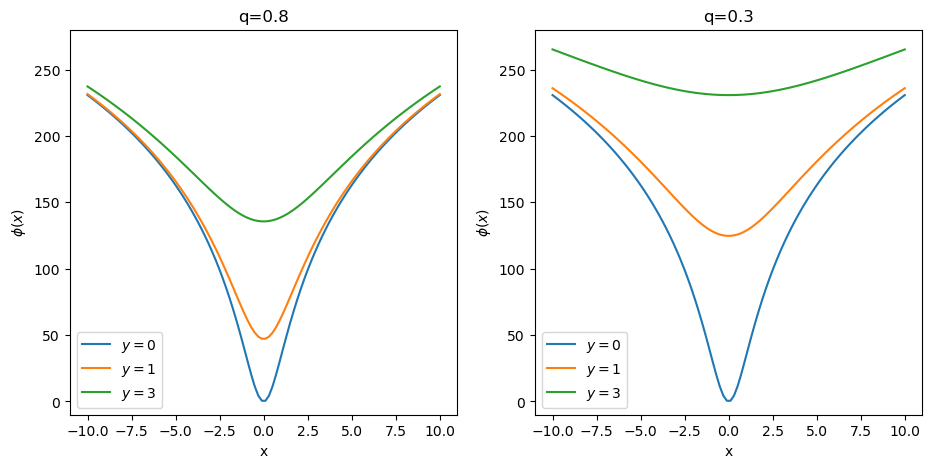

In [3]:
# Visualize phi(x,y) at fixed y
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,5))

lim = 10
# q = 0.8
logpot1.plot_x(-lim,lim,y=0,label='$y=0$',ax=ax1)
logpot1.plot_x(-lim,lim,y=1,label='$y=1$',ax=ax1)
logpot1.plot_x(-lim,lim,y=3,label='$y=3$',ax=ax1)
ax1.set_xlabel('x')
ax1.set_ylabel('$\phi(x)$')
ax1.legend()
ax1.set_title('q=0.8')
ax1.set_ylim(-10,280)

# q = 0.3
logpot2.plot_x(-lim,lim,y=0,label='$y=0$',ax=ax2)
logpot2.plot_x(-lim,lim,y=1,label='$y=1$',ax=ax2)
logpot2.plot_x(-lim,lim,y=3,label='$y=3$',ax=ax2)
ax2.set_xlabel('x')
ax2.set_ylabel('$\phi(x)$')
ax2.legend()
ax2.set_title('q=0.3')
ax2.set_ylim(-10,280)

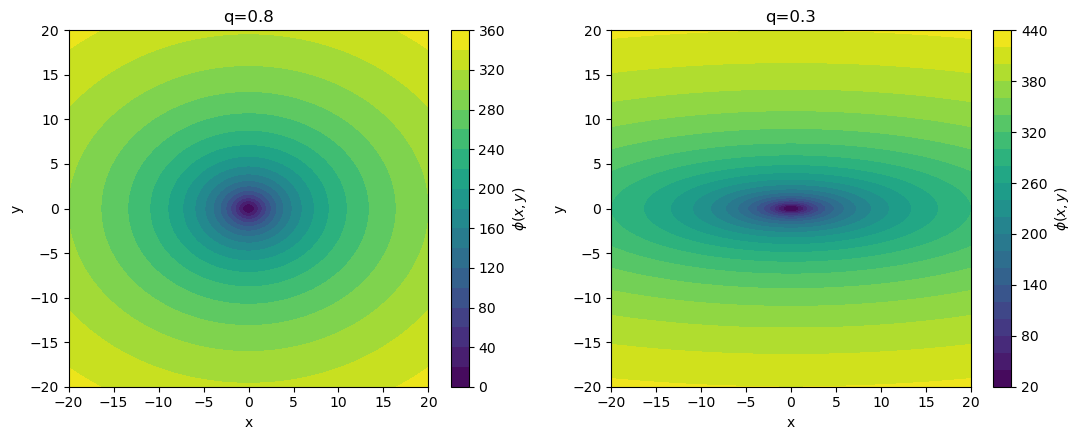

In [4]:
# Visualize phi(x,y) as contours
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,4.5))

lim = 20
# q = 0.8
im1 = logpot1.plotcontour(-lim,lim,-lim,lim,ax=ax1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('q=0.8')
plt.colorbar(im1,ax=ax1,label='$\phi(x,y)$')

# q = 0.3
im2 = logpot2.plotcontour(-lim,lim,-lim,lim,ax=ax2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('q=0.3')
plt.colorbar(im2,ax=ax2,label='$\phi(x,y)$')

fig.tight_layout()

## Example 2: Rotating Logarithmic Potential
A typical use-case of the potential shown above is to describe the potentials of non-axisymmetric galaxies. Typically, these galaxies rotate with respect to inertial space, with a **pattern speed** $\Omega_b$. In the non-rotating frame, this rotation can be described by an effective potential:
$$\phi_{eff}(x,y) = \phi_L(x,y) - \frac{1}{2} \omega^2 (x^2 + y^2).$$
Let's see how to implement this in poincarepy:

In [5]:
# Create the "rotation potential" object:
rotpot = pot.zRotation(omega=1.0)

# Create a summed potential with the q=0.3 log potential of above:
rotlogpot1 = pot.CombinedPotential(logpot1,rotpot)
rotlogpot2 = pot.CombinedPotential(logpot2,rotpot)

As before, we can visualize the resulting potential

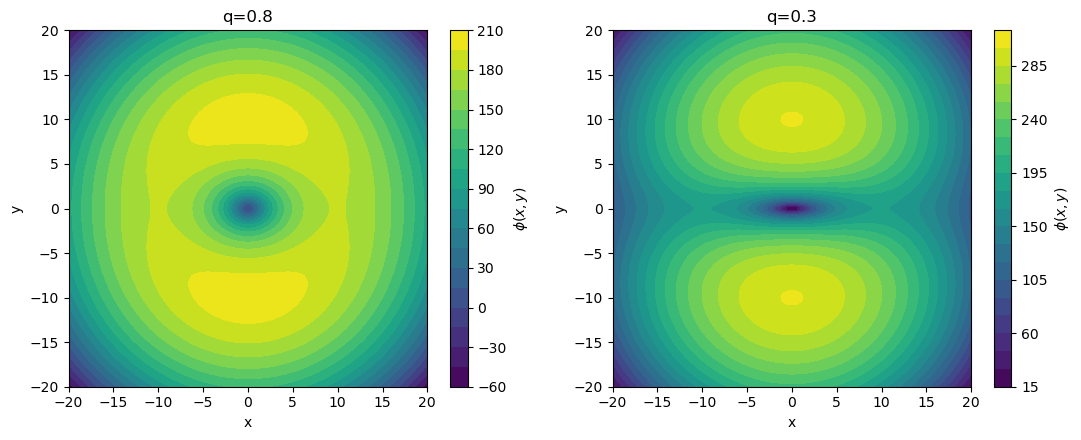

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,4.5))

lim = 20
# q = 0.8
im1 = rotlogpot1.plotcontour(-lim,lim,-lim,lim,ax=ax1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('q=0.8')
plt.colorbar(im1,ax=ax1,label='$\phi(x,y)$')

# q = 0.3
im2 = rotlogpot2.plotcontour(-lim,lim,-lim,lim,ax=ax2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('q=0.3')
plt.colorbar(im2,ax=ax2,label='$\phi(x,y)$')

fig.tight_layout()

One can clearly see the structure with Lagrange points seen in the lecture emerge visually!

## Example 3: Effective Axisymmetric Potential
Earlier in the lecture we saw that motion in the 3D space $(R,\phi,z)$ can, when the potential is axisymmetric ($\phi(R,\phi,z) \equiv \phi(R,z)$) be reduced to 2D motion in the **meridonal plane** under the potential
$$\phi_{eff}(R,z) = \phi(R,z) + \frac{L_z^2}{2R^2},$$
where $L_z$ is the $z$-component of the angular moment, which is conserved due to the symmetry around $z$. In particular, we saw the case of the following effective potential:
$$\phi_{eff}(R,z) = \frac{1}{2}v_0^2 \log{\left(R^2 + \frac{z^2}{q^2}\right)} + \frac{L_z^2}{2R^2}.$$
This potential is called `EffectiveLogarithmic_cylindrical` in poincarepy.

In [7]:
# Create potential object
efflogpot1 = pot.EffectiveLogarithmic_cylindrical(rc=0.,q=0.9,Lz=0.2,v0=1) # rc is an additional additive constant inside the log
efflogpot2 = pot.EffectiveLogarithmic_cylindrical(rc=0.,q=0.5,Lz=0.2,v0=1)

These realizations correspond to the ones shown in Binney & Tremaine, section 3.2.1. You can visualize them as before, noting that the coordinates $(x,y)$ are replaced by $(R,z)$:

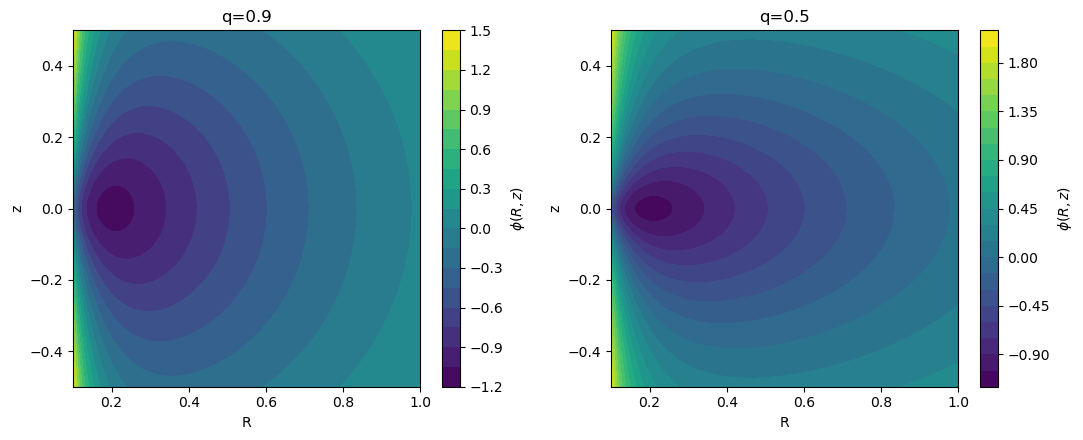

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,4.5))

# Note that in this case (x,y) -> (R,z) and that there is a singularity at R = 0
zlim = 0.5
rmin = 0.1
rmax = 1.0

# q = 0.8
im1 = efflogpot1.plotcontour(rmin,rmax,-zlim,zlim,ax=ax1)
ax1.set_xlabel('R')
ax1.set_ylabel('z')
ax1.set_title('q=0.9')
plt.colorbar(im1,ax=ax1,label='$\phi(R,z)$')

# q = 0.3
im2 = efflogpot2.plotcontour(rmin,rmax,-zlim,zlim,ax=ax2)
ax2.set_xlabel('R')
ax2.set_ylabel('z')
ax2.set_title('q=0.5')
plt.colorbar(im2,ax=ax2,label='$\phi(R,z)$')

fig.tight_layout()